In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies." 

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**Q1: put your answer here (please keep it brief, 3-5 sentences)**

The NorthEuraLex dataset is essentially a lexical dictionary of concepts, where for a set of 1016 concepts, lexical features such as spelling and pronounciation are listed for 107 languages from across a large geographic area and several language families, although focusing mostly on languages from Northern Eurasia. The purpose of the dataset is to be common ground for new benchmarks in the field of computational historical linguistics, in particular to improve computational models of relationships between languages, including models of language contact. The dataset was constructed from a large range of published dictionaries in both print and digital format, where the researchers manually went through and extracted the information. Once this was done, language experts were used for confirmation and corrections.

Let's read in the wordforms in this dataset.

In [26]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**Q2: put your answer here (please keep it brief, no more than 1 sentence per column)**

`Language_ID`: The ISO 639-3 code of the language, an international standard for language codes.

`Concept_ID`: The lemma of the concept in German combined with the part of speech tag.

`rawIPA`: International Phonetic Alphabet (IPA) coding of the word pronounciation, taken directly from the source.

`IPA`: Consistent IPA coding of each word, derived from the raw IPA using an automatic transcription system developed by the authors.

Now let's read in some metadata about the languages.

In [27]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


***Question 3:*** Describe the meaning of the `Family`, `iso_code`, and `subfamily` columns of the data.

**Q3: put your answer here (please keep it brief, no more than 1 sentence per column)**

`Family`: A group of languages that all descend from a single common ancestral language.

`iso_code`: The ISO 639-3 code of the language, an international standard for language codes.

`subfamily`: A smaller group of related languages within a language family.

Now let's read in some further data about the concepts.



In [28]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**Q4: put your answer here (please keep it brief, no more than 1 sentence per column)**

`id_nelex`: The lemma of the concept in German combined with the part of speech tag.

`gloss_en`: The concept written in English, sometimes using more than 1 word due to the polysemous nature of the English word.

`position_in_ranking`: Ranking as defined by 'the basicness score' presented by Dellert and Buch (2018), which combines a cross-linguistically
applicable measure of form simplicity with a form-distance based measure of
stability.

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [29]:
# Problem 1a: rename the approproate columns in the languages and concepts dataframes to make this merge possible.
#your code here
languages = languages.rename(columns={'glotto_code': 'Glottocode', 'iso_code': 'Language_ID'})
concepts = concepts.rename(columns={'id_nelex': 'Concept_ID'})
# Problem 1b: Use the merge function to merge the three dataframes into one.
#your code here
wordforms = wordforms.merge(languages, on=['Glottocode', 'Language_ID']).merge(concepts, on='Concept_ID')

display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,Finnish,Uralic,Finnic,61.0000,24.4500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,krl,kare1335,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,North Karelian,Uralic,Finnic,65.1691,30.8655,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
2,olo,livv1243,Auge::N,silmy,silmʏ,s i l m ʏ,silmi,SILMY,SVRMV,validate,Olonets Karelian,Uralic,Finnic,61.0000,33.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
3,vep,veps1250,Auge::N,sil'm,silʲm,s i lʲ m,silm,SILM,SVRM,validate,Veps,Uralic,Finnic,60.3353,34.7865,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
4,ekk,esto1258,Auge::N,silm,sʲilm,sʲ i l m,silm,SILM,SVRM,validate,Estonian,Uralic,Finnic,59.2500,24.7500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,che,chec1245,ertragen::V,садетта,sədetːə,s ə d e t t ə,s3det3,SETETE,SVTVTV,review,Chechen,Nakh-Daghestanian,Nakh,43.5000,45.5000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121609,arb,stan1318,ertragen::V,أطاق,atˤaːqa,a tˤ a a q a,ataqa,ATAKA,VTVKV,validate,Standard Arabic,Afro-Asiatic,Semitic,27.9625,43.8525,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121610,arb,stan1318,ertragen::V,تحمل,taħamala,t a ħ a m a l a,taGamala,TAHAMALA,TVHVMVRV,validate,Standard Arabic,Afro-Asiatic,Semitic,27.9625,43.8525,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121611,heb,hebr1245,ertragen::V,סבל,saval,s a v a l,saval,SABAL,SVWVR,validate,Modern Hebrew,Afro-Asiatic,Semitic,31.1056,35.0179,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](ttps://lingpy.org/index.html). We'll start by installing the package.

In [6]:
!pip install lingpy

     |████████████████████████████████| 590 kB 16.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 195 kB 54.3 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 561 kB 43.7 MB/s 


In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [30]:
#Problem 2a: Filter our the non-Indo-European languages from the wordforms and languages dataframes
#your code here
wordforms = wordforms[wordforms['family'] == 'Indo-European']
languages = languages[languages['family'] == 'Indo-European']
#Problem 2b: Filter our the concepts which appear less than or equal to rank 20 in the concepts dataframe.
max_rank=50
# your code here
concepts = concepts[concepts['position_in_ranking'] < max_rank]

Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we we will compute the normalized levenshtein distance between the words for Auge::N (eye in English) for German and English and then similarily for all 19 other concepts. We will then average these values to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [31]:
import lingpy as lp
import numpy as np

#initialize confusion matrix
confusion= [[0 for j in range(len(languages))] for i in range(len(languages))]


#Problem 3: fill the confusion matrix  using the 
#lp.align.pairwise.edit_dist function from lingpy, on 
#the "IPA" fields for each language.
for lang1_idx, language1 in enumerate(languages['Language_ID']):
    for lang2_idx, language2 in enumerate(languages['Language_ID']):
        lang1_concepts = wordforms[wordforms['Language_ID'] == language1]
        lang2_concepts = wordforms[wordforms['Language_ID'] == language2]
        distances=[]
        for concept in concepts["Concept_ID"]:
            try:
                lang1_ipa = lang1_concepts.loc[lang1_concepts['Concept_ID'] == concept, 'IPA'].item()
            except ValueError:
                lang1_ipa = lang1_concepts.loc[lang1_concepts['Concept_ID'] == concept, 'IPA'].iloc[0]

            try:
                lang2_ipa = lang2_concepts.loc[lang2_concepts['Concept_ID'] == concept, 'IPA'].item()
            except ValueError:
                lang2_ipa = lang2_concepts.loc[lang2_concepts['Concept_ID'] == concept, 'IPA'].iloc[0]

            dist = lp.align.pairwise.edit_dist(lang1_ipa, lang2_ipa, normalized=True)
            distances.append(dist)

        confusion[lang1_idx][lang2_idx] = sum(dist / len(distances) for dist in distances)
    

Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages. 


In [18]:
language_names = [name + ' - ' + subfamily for name, subfamily in zip(languages["name"].values, languages["subfamily"].values)]
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_names)

{0: ['Bengali - Indo-Aryan', 'Hindi - Indo-Aryan'],
 2: ['Northern Pashto - Iranian', 'Ossetian - Iranian'],
 3: ['Western Farsi - Iranian', 'Northern Kurdish - Iranian'],
 6: ['Armenian - Armenic'],
 7: ['Modern Greek - Graeco-Phrygian'],
 8: ['Standard Albanian - Albanian'],
 9: ['Bulgarian - Balto-Slavic',
  'Croatian - Balto-Slavic',
  'Slovene - Balto-Slavic',
  'Slovak - Balto-Slavic',
  'Polish - Balto-Slavic',
  'Czech - Balto-Slavic',
  'Belarusian - Balto-Slavic',
  'Russian - Balto-Slavic',
  'Ukrainian - Balto-Slavic',
  'Lithuanian - Balto-Slavic',
  'Latvian - Balto-Slavic'],
 20: ['Icelandic - Germanic',
  'Norwegian (Bokmål) - Germanic',
  'Swedish - Germanic',
  'Danish - Germanic',
  'German - Germanic',
  'Dutch - Germanic',
  'English - Germanic'],
 27: ['Irish - Celtic'],
 28: ['Welsh - Celtic'],
 29: ['Breton - Celtic'],
 30: ['Latin - Italic'],
 31: ['French - Italic'],
 32: ['Catalan - Italic',
  'Spanish - Italic',
  'Italian - Italic',
  'Portuguese - Italic',

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy erros in this clustering?

**Q5: put your answer here (please keep it brief, no more than 4-5 sentences.)**

The clustering algorithm has correctly found many language clusters, including perfectly grouping Germanic, Balto-Slavic and Indo-Aryan subfamilies of languages with each other.  The clustering algorithm has also done well to delineate the relationship between subfamilies, with Italic and Celtic languages appearing next to each other, and Iranian and Indo-Aryan subfamilies appearing next to each other, as is true given our current understanding of the evolution of these languages. The clustering algorithm has however failed to cluster Celtic languages, hasn't included Latin and French with the other Italic languages, and wasn't able to cluster all Iranian languages together. This could be because Celtic for example is a more diverse sub-family of languages than the Germanic sub-family.



Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


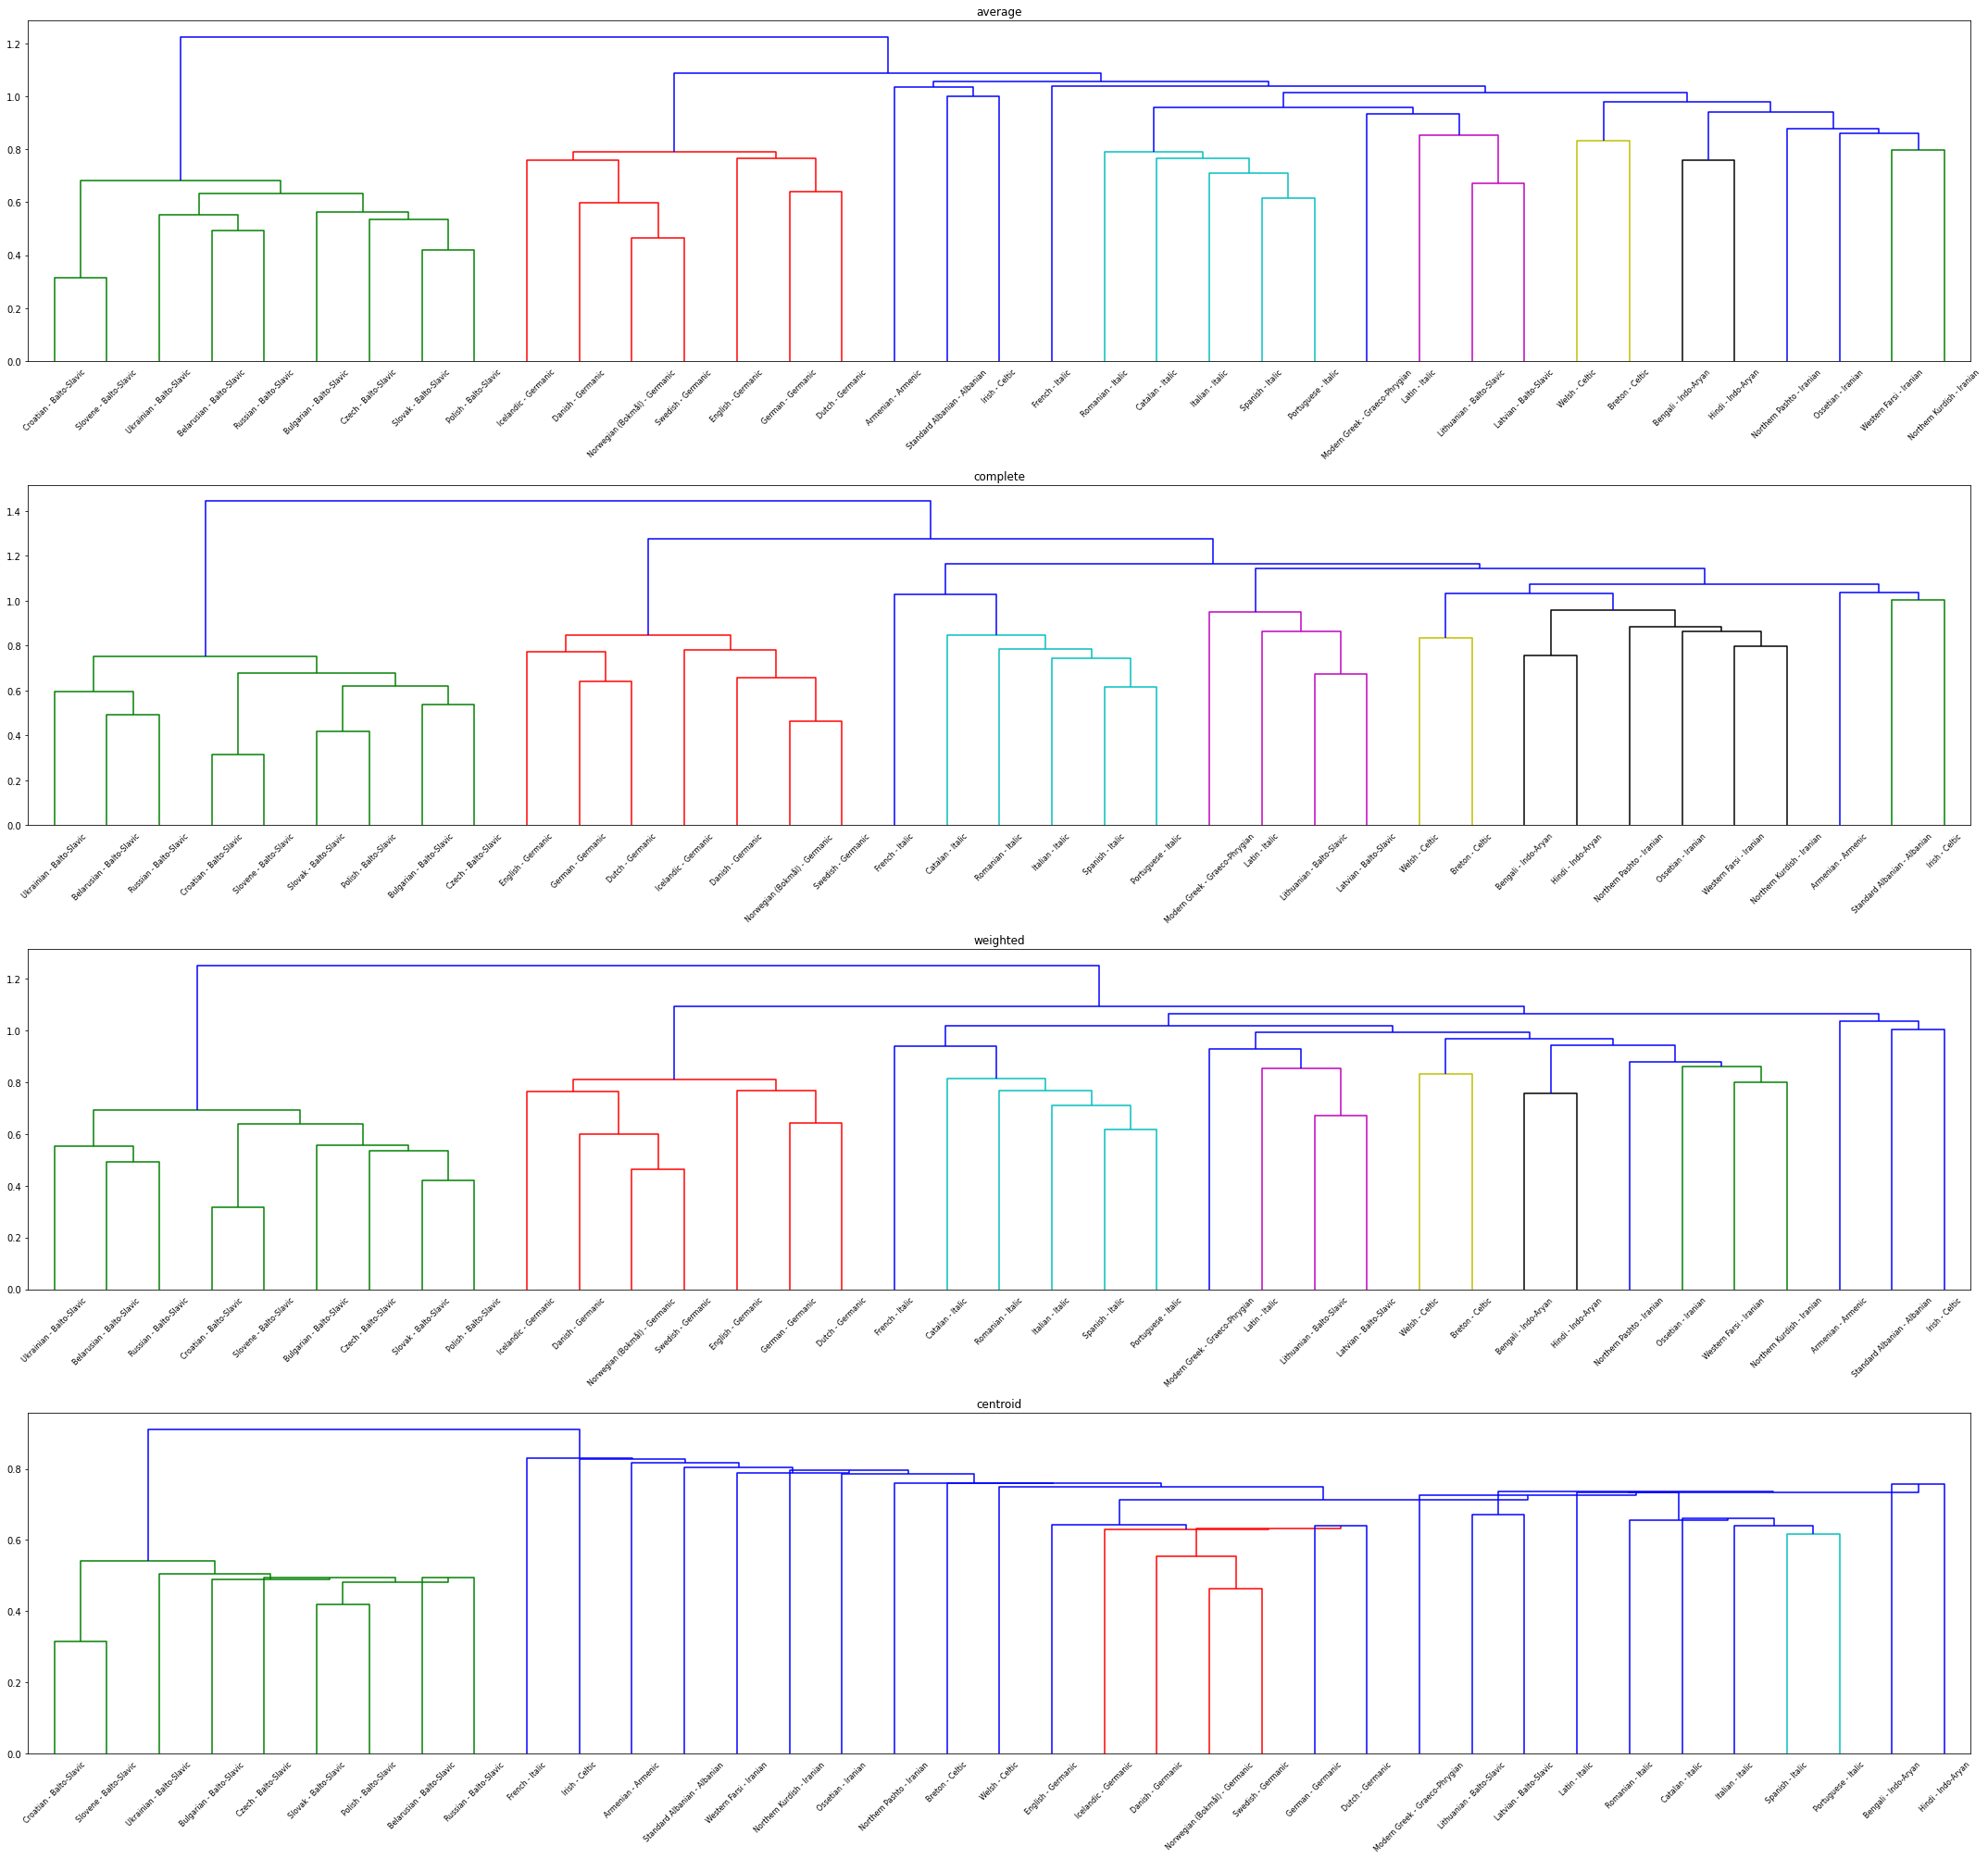

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

#Problem 4: use the linkage function with the average linkage method to compute the clustering.
fig, plts = plt.subplots(figsize=(30, 28), nrows=4)

methods = ['average', 'complete', 'weighted', 'centroid']
for idx, method in enumerate(methods):
    linked = linkage(confusion, method=method)

    #plot the results using dendrogram
    def llf(id): return [name + ' - ' + subfamily for name, subfamily in zip(languages["name"].values, languages["subfamily"].values)][id]
    plts[idx].set_title(method)
    dendrogram(linked,
            p=100,
            truncate_mode="level",
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False,
            leaf_label_func=llf,
            ax=plts[idx])

plt.tight_layout()
plt.show()

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy erros in this clustering?

**Q6: put your answer here (please keep it brief, no more than 4-5 sentences.)**

The clustering algorithm correctly clusters  Germanic languages with each other, and Balto-Slavic, Celtic, Italic and Iranian languages with each other to a lesser extent. On top of this, it correctly shows Iranian and Indo-Aryan language subfamilies as being closely related. However the clustering algorithm does poorly with Italic languages, showing Latin and French as distinctly different from the other Italic languages, as seen before with the non-hierarchical clustering. This common error indicates Latin and French are distinct outliers in terms of pronunciation in the Italic subfamily. It incorrectly shows that Iranian and Indo-Aryan languages are more similar to Italic languages than Germanic languages, when in fact Italic and Germanic languages are much more similar to each other than with Iranian and Indo-Aryan languages.

***Question 7:*** Try three of the other linkage methods and describe how the change the results.

**Q7: put your answer here (please keep it brief, no more than 4-5 sentences.)**

The 'complete' method creates the largest clusters of any of the clustering methods tried, implying that the nature of the 'complete' method finding the max distance as a distance metric allows relatively diverse languages to be clustered together. The centroid method produced the smallest clusters, alongside clustering many of the languages as single language clusters. The weighted method occupied a middle grown of cluster size. The complete and weighted methods produced reasonably accurate clusters, although not as accurate as average. The centroid method produced incredibly inaccurate clusters, with a difficult to interpret language hierarchy tree, implying that the the languages in each cluster are diverse enough that the centroid of the cluster is a poor representation of the cluster.

***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**Q8: put your answer here (please keep it brief, no more than 3-4 sentences.)**

Increasing the number of concepts we average across in the confusion matrix to 50 changes the results, but does not necessarily make them better. The Celtic languages are clustered more poorly, with Irish appearing further away from the others. Another interesting difference across a few clustering methods is that Italian and Latin, and Latvian and Lithuanian, are more often split off from their Italic and Balto-Slavic clusters respectively. These more instances of individual languages splitting off from the clusters implies that using more concepts to compute the distance allows less common and more foreign sounding concepts from each language to change language distances, and represent the more complex influences of each language than a simple tree model might suggest.